# Lets have a look at the data and how it is distributed!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import latex
import matplotlib as mpl
import os
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin/'

RSEED=42

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
df['step_id']=df.id.apply(lambda x: (x-1)%80)

## Distribution of the data set

In [4]:
df.query('step_id==1').groupby(['R', 'C']).count()

id  breath_id  time_step   u_in  u_out  pressure  step_id
R  C                                                               
5  10   8312       8312       8312   8312   8312      8312     8312
   20   8277       8277       8277   8277   8277      8277     8277
   50   8271       8271       8271   8271   8271      8271     8271
20 10   6070       6070       6070   6070   6070      6070     6070
   20   6208       6208       6208   6208   6208      6208     6208
   50   8186       8186       8186   8186   8186      8186     8186
50 10  13677      13677      13677  13677  13677     13677    13677
   20   8260       8260       8260   8260   8260      8260     8260
   50   8189       8189       8189   8189   8189      8189     8189

/var/folders/fx/jr2m6h953_103f1b248p3r6h0000gn/T/ipykernel_68228/2039635289.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '2000', '4000', '6000', '8000', '10000', '12000', '14000'], fontsize=ticklabelsize, color=tickcolor)


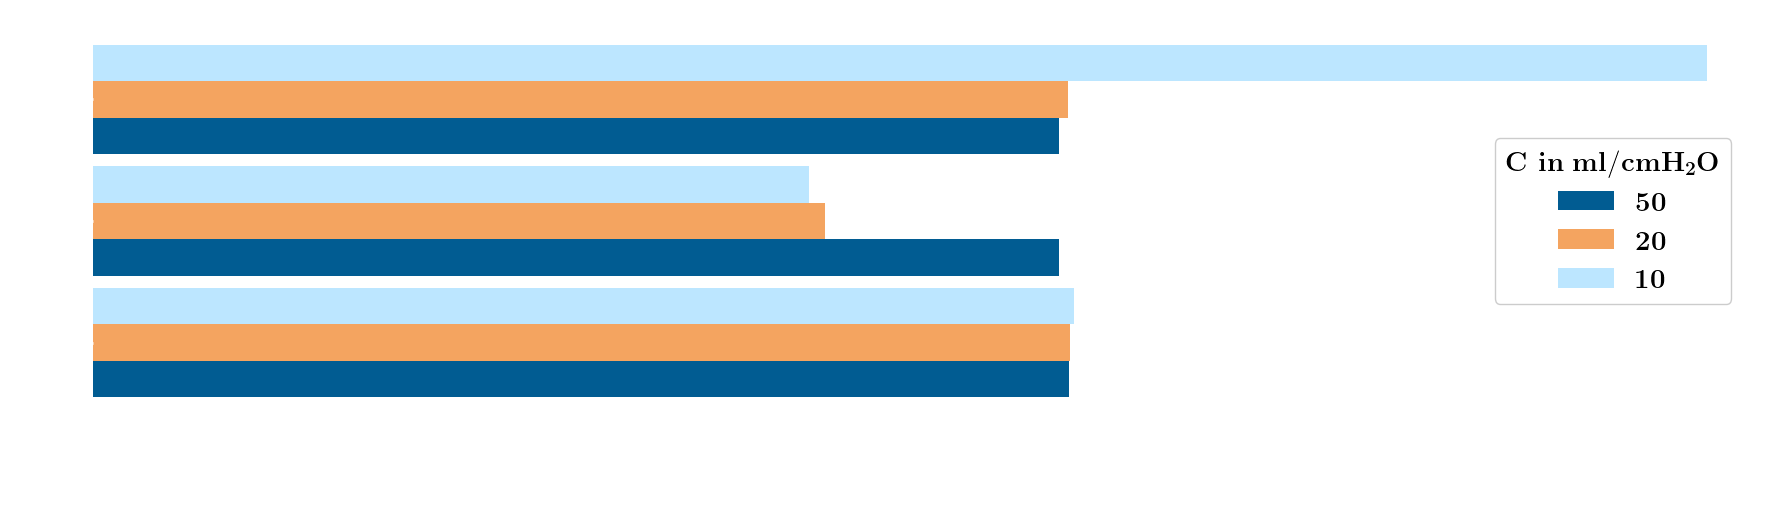

In [5]:
mpl.rc('text', usetex=True)
plt.rc('font', family='serif')

tickcolor = 'white'
spinecolor = 'white'
labelcolor = 'white'
titlecolor = 'white'

ticklabelsize = 22
labelsize = 26
titlesize = 30

lengthC10 = [8312, 6070, 13677]
lengthC20 = [8277, 6208, 8260]
lengthC50 = [8271, 8186, 8189]

### best blue combo
color1 = '#015C92'
color2 = 'sandybrown'
color3 = '#BCE6FF'

bars = ('20', '5', '50')
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(1,1,figsize=(18,5))

# Create bars with different colors
bar1=plt.barh(y_pos[2]+0.3, lengthC10[2], color=[color3], height=0.3)
bar2=plt.barh(y_pos[2], lengthC20[2], color=[color2], height=0.3)
bar3=plt.barh(y_pos[2]-0.3, lengthC50[2], color=[color1], height=0.3)
bar4=plt.barh(y_pos[1]+0.3, lengthC10[1], color=[color3], height=0.3)
bar5=plt.barh(y_pos[1], lengthC20[1], color=[color2], height=0.3)
bar6=plt.barh(y_pos[1]-0.3, lengthC50[1], color=[color1], height=0.3)
bar7=plt.barh(y_pos[0]+0.3, lengthC10[0], color=[color3], height=0.3)
bar8=plt.barh(y_pos[0], lengthC20[0], color=[color2], height=0.3)
bar9=plt.barh(y_pos[0]-0.3, lengthC50[0], color=[color1], height=0.3)

plt.yticks(y_pos, bars)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(spinecolor)
ax.spines['bottom'].set_linewidth(2.)

ax.set_xticklabels(['0', '2000', '4000', '6000', '8000', '10000', '12000', '14000'], fontsize=ticklabelsize, color=tickcolor)
ax.set_yticklabels(['5', '20', '50'], fontsize=ticklabelsize, color=tickcolor)
ax.set_ylabel(r'\textbf{Resistance R in} $\mathbf{cmH_2O/l/s}$', fontsize=labelsize-3, color=labelcolor)
ax.set_xlabel(r'\textbf{number of samples}', fontsize=labelsize, color=labelcolor)
ax.tick_params('both', size=9, width=2., colors=tickcolor)
plt.xlim(0,14000)

legend = ax.legend(title=r'\textbf{C in} $\mathbf{ml/cmH_2O}$', title_fontsize=20, fontsize=20, handles=[bar3, bar2, bar1], labels=[r'\textbf{50}', r'\textbf{20}', r'\textbf{10}'], loc='center right')
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('silver')

plt.tight_layout()
#plt.savefig('countvert.png', transparent=True)
plt.show()

## Some sample breaths

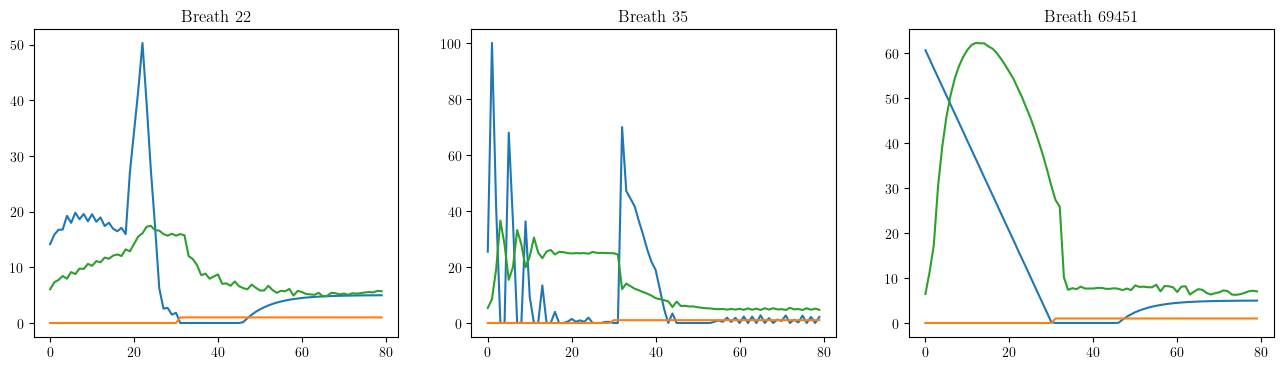

In [6]:
f, ax = plt.subplots(figsize=(16, 4))
plt.subplot(131)
plt.plot(np.arange(0,80,1), df.query('breath_id==22').u_in)
plt.plot(np.arange(0,80,1), df.query('breath_id==22').u_out)
plt.plot(np.arange(0,80,1), df.query('breath_id==22').pressure)
plt.title('Breath 22')
plt.subplot(132)
plt.plot(np.arange(0,80,1), df.query('breath_id==35').u_in)
plt.plot(np.arange(0,80,1), df.query('breath_id==35').u_out)
plt.plot(np.arange(0,80,1), df.query('breath_id==35').pressure)
plt.title('Breath 35')
plt.subplot(133)
plt.plot(np.arange(0,80,1), df.query('breath_id==69451').u_in)
plt.plot(np.arange(0,80,1), df.query('breath_id==69451').u_out)
plt.plot(np.arange(0,80,1), df.query('breath_id==69451').pressure)
plt.title('Breath 69451')
plt.show()

## Pressure and flow profiles

To get a first impression of our data set we plotted the pressure values for every possible R, C parameter combination.

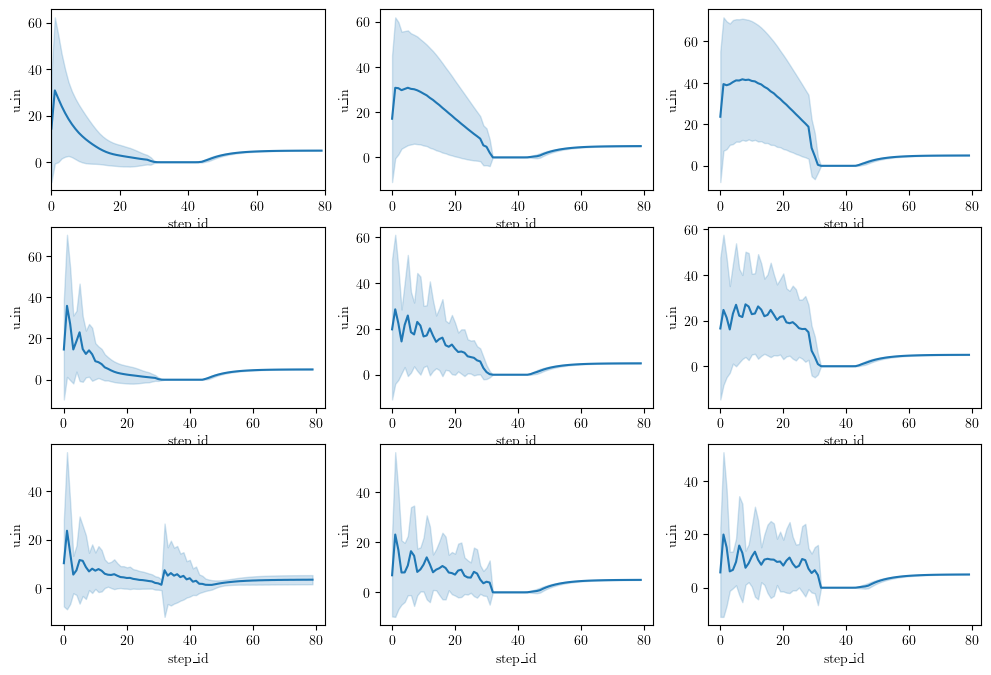

In [7]:
# inflow profiles

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
feature='u_in'

plt.subplot(3,3,1)
axes[0,0]=sns.lineplot(data=df.query('C==10 & R==5'), x='step_id', y=feature, ci='sd')
plt.xlim(0,80)
plt.subplot(3,3,2)
axes[1,0]=sns.lineplot(data=df.query('C==20 & R==5'), x='step_id', y=feature, ci='sd')
plt.subplot(3,3,3)
axes[2,0]=sns.lineplot(data=df.query('C==50 & R==5'), x='step_id', y=feature, ci='sd')

plt.subplot(3,3,4)
axes[1,0]=sns.lineplot(data=df.query('C==10 & R==20'), x='step_id', y=feature, ci='sd')
plt.subplot(3,3,5)
axes[1,1]=sns.lineplot(data=df.query('C==20 & R==20'), x='step_id', y=feature, ci='sd')
plt.subplot(3,3,6)
axes[1,2]=sns.lineplot(data=df.query('C==50 & R==20'), x='step_id', y=feature, ci='sd')

plt.subplot(3,3,7)
axes[1,0]=sns.lineplot(data=df.query('C==10 & R==50'), x='step_id', y=feature, ci='sd')
plt.subplot(3,3,8)
axes[1,1]=sns.lineplot(data=df.query('C==20 & R==50'), x='step_id', y=feature, ci='sd')
plt.subplot(3,3,9)
axes[1,2]=sns.lineplot(data=df.query('C==50 & R==50'), x='step_id', y=feature, ci='sd')

cols = ['C=10','C=20','C=50']
rows = ['R=5','R=20','R=50']

plt.show()

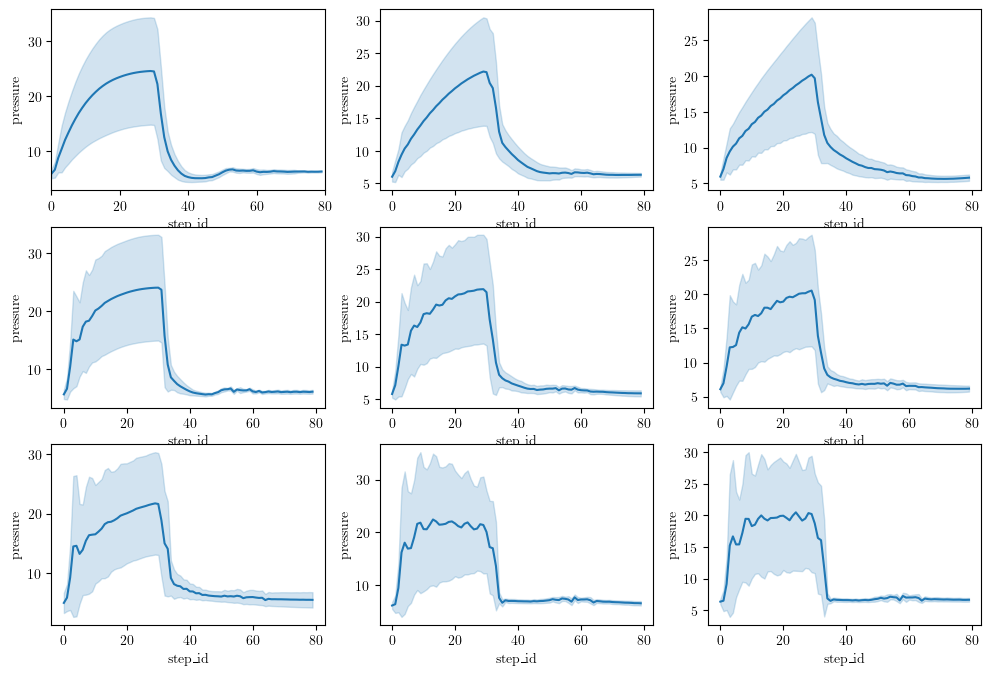

In [8]:
# pressure profiles

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
feature='pressure'

plt.subplot(3,3,1)
axes[0,0]=sns.lineplot(data=df.query('C==10 & R==5'), x='step_id', y=feature, ci='sd')
plt.xlim(0,80)
plt.subplot(3,3,2)
axes[1,0]=sns.lineplot(data=df.query('C==20 & R==5'), x='step_id', y=feature, ci='sd')
plt.subplot(3,3,3)
axes[2,0]=sns.lineplot(data=df.query('C==50 & R==5'), x='step_id', y=feature, ci='sd')

plt.subplot(3,3,4)
axes[1,0]=sns.lineplot(data=df.query('C==10 & R==20'), x='step_id', y=feature, ci='sd')
plt.subplot(3,3,5)
axes[1,1]=sns.lineplot(data=df.query('C==20 & R==20'), x='step_id', y=feature, ci='sd')
plt.subplot(3,3,6)
axes[1,2]=sns.lineplot(data=df.query('C==50 & R==20'), x='step_id', y=feature, ci='sd')

plt.subplot(3,3,7)
axes[1,0]=sns.lineplot(data=df.query('C==10 & R==50'), x='step_id', y=feature, ci='sd')
plt.subplot(3,3,8)
axes[1,1]=sns.lineplot(data=df.query('C==20 & R==50'), x='step_id', y=feature, ci='sd')
plt.subplot(3,3,9)
axes[1,2]=sns.lineplot(data=df.query('C==50 & R==50'), x='step_id', y=feature, ci='sd')

cols = ['C=10','C=20','C=50']
rows = ['R=5','R=20','R=50']

plt.show()

We see that the pressures corresponding to healthy lung attributes (low resistance and high compliance) are pretty smooth and have a (relatively) small standard deviation. The pressure profiles for unhealthy lungs show large oscillations and also much larger standard deviations compared to healthy lungs
Notice that the confidence intervals in the plot above are the depicting the standard deviation. In the following plot which is also in the final presentation, the confidence interval depicts the values containing 95% of all the data points.

In [9]:
def my_ci(data, perc=95):
    n=data.shape[0]

    lower_bounds = []
    upper_bounds = []
    '''calculate means'''
    means=data.groupby('step_id').pressure.mean().to_numpy()
    for step in data.step_id.unique():
        data_step=data[data['step_id']==step].pressure.to_numpy()
        data_step.sort()
        cut_index=int(perc/100.*len(data_step))
        lower_bounds.append(data_step[-cut_index])
        upper_bounds.append(data_step[+cut_index])
    return lower_bounds, means, upper_bounds

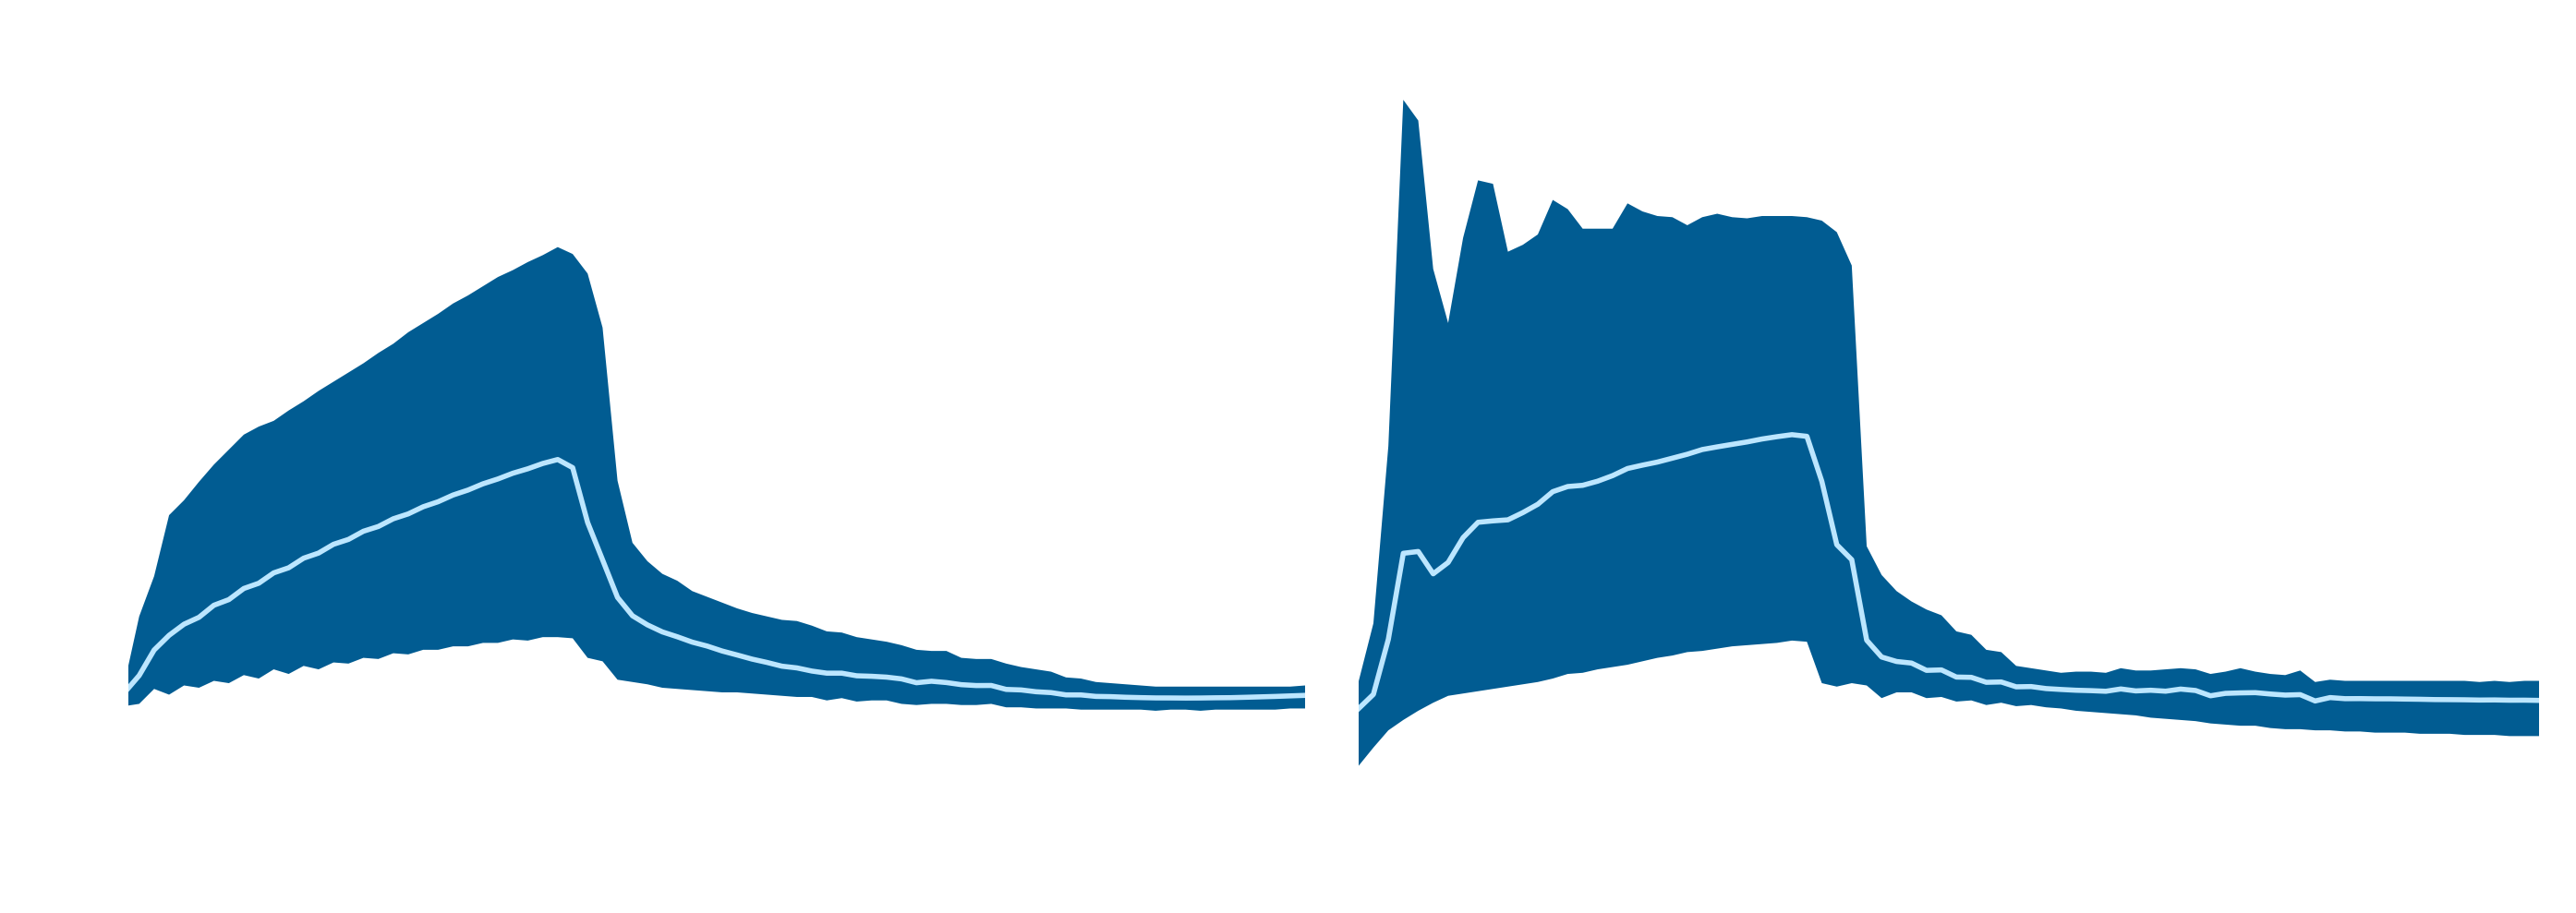

In [10]:
'''plot version with white spines, etc. without bold symbols'''

lines1=my_ci(df.query('R==5 & C==50'))
lines2=my_ci(df.query('R==50 & C==10'))

tick_fsize=38
label_size=40
title_size=40

color1 = '#015C92'
color2 = '#5BAEB7'
color3 = '#BCE6FF'

cicol=color1
linecol=color3
spinecolor='white'
tickcolor='white'
labelcolor='white'
plotlabelcol='white'

cialpha=1.0
x=np.arange(0,80,1)

fig=plt.figure(figsize=(28,10.))

ax1 = fig.add_subplot(121)
plt.plot(x, lines1[1], c=linecol, linewidth=4.)
ax1.fill_between(x, lines1[0], lines1[1], facecolor=cicol)
ax1.fill_between(x, lines1[1], lines1[2], facecolor=cicol)

plt.ylim(0,45)
plt.xlim(0,79)

plt.subplots_adjust(hspace=.2, wspace=.4, bottom=0.3)


ax2 = fig.add_subplot(122, sharey=ax1)
plt.plot(x, lines2[1], c=linecol, linewidth=4.)
ax2.fill_between(x, lines2[0], lines2[1], facecolor=cicol)
ax2.fill_between(x, lines2[1], lines2[2], facecolor=cicol)

plt.ylim(0,45)
plt.xlim(0,79)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(5.)
ax1.spines['left'].set_linewidth(5.)
ax1.spines['bottom'].set_color(spinecolor)
ax1.spines['left'].set_color(spinecolor)
ax1.tick_params('both', size=12, width=5., colors='white')

ax1.set_yticks(np.arange(0,46,5))
ax1.set_xticks([0, 79/3., 2.*79/3., 79])
ax1.set_xticklabels(['0', '1.0', '2.0', '3.0'], fontsize=tick_fsize, color=tickcolor)
ax1.set_yticklabels(np.arange(0,46,5), fontsize=tick_fsize, color=tickcolor)
ax1.set_xlabel(r'time in s', fontsize=label_size, color=labelcolor, fontweight='bold')
ax1.set_ylabel(r'pressure in cmH$_2$O', fontsize=label_size, color=labelcolor, fontweight='bold')
ax1.set_title(r'R=5, C=50', fontsize=title_size, color=plotlabelcol, fontweight='bold')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_linewidth(5.)
ax2.spines['bottom'].set_color(spinecolor)
ax2.tick_params('x', size=12, width=5., colors='white')
ax2.get_yaxis().set_visible(False)
ax2.yaxis.tick_right()

ax2.set_xticks([0, 79/3., 2.*79/3., 79])
ax2.set_xticklabels(['0', '1.0', '2.0', '3.0'], fontsize=tick_fsize)
ax2.set_xlabel(r'time in s', fontsize=label_size, color=labelcolor, fontweight='bold')
ax2.set_title(r'R=50, C=10', fontsize=title_size, color=plotlabelcol, fontweight='bold')

plt.tight_layout()
#plt.savefig('shapeR50_C10.png', transparent=True)
plt.show()

## autocorrelation functions

Regarding the problem as a time series problem and thus assuming the breaths are consecutive, it makes sense at the correlation in time. For this we plot the (partial) autocorrelation function for the first 150 breaths (using all breaths is not feasible).

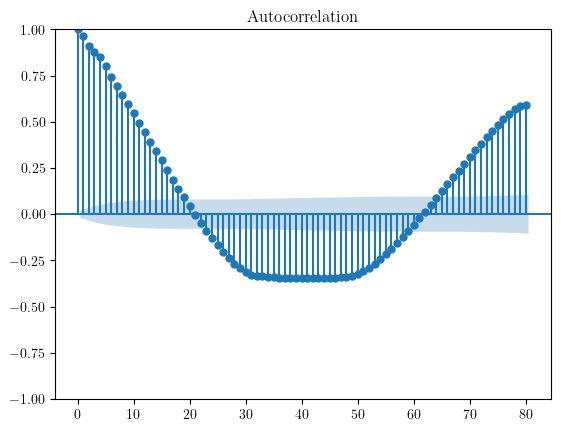

In [11]:
data = df.query('breath_id<160')
plot_acf(data.pressure, lags=80)
plt.show()

As expected there is a pretty large positive correlation for lag 80 given by periodical nature of our data. The negative correlation between lags 20 and 60 is due to the different pressures in the inspiratory and expiratory phase.

/Users/martin/Projects/CapStone/.venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


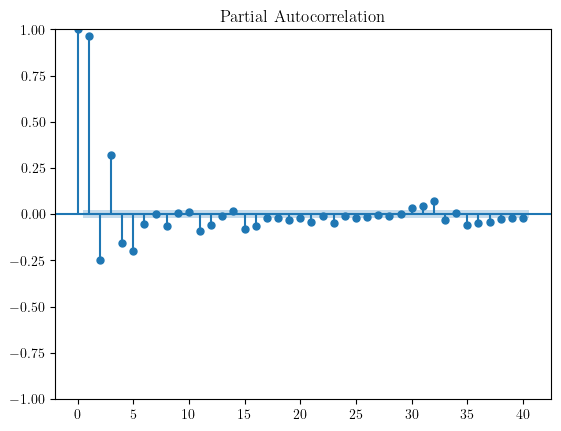

In [12]:
plot_pacf(data.pressure)
plt.show()

We see that the first 5 points of the partial autocorrelation function have a significant weight and need to be taken into account for autoregressive models.

## Correlation and distribution of new features

In [13]:
df_feats = df.copy()
new_feats = pd.read_csv('../data/all_featsv5.csv')
df_feats = df_feats.merge(new_feats, on='id')

In [14]:
df_feats = df_feats.drop(['vt', 'vf', 'time_step', 'step_id_x'], axis=1)
df_feats.rename(columns={'step_id_y':'step_id'})

,id,breath_id,R,C,u_in,u_out,pressure,a1,b1,c1,...,v,step_id,pm1,pm2,pm3,pm4,pm5,rm3,rm4,rm5
0,1,1,20,50,0.083334,0,5.837492,69.223653,-42.844553,-0.000869,...,1.666680,0,6.190067,6.175115,6.172582,6.171869,6.173080,6.179255,6.177409,6.176543
1,2,1,20,50,18.383041,0,5.907794,69.223653,-42.844553,-0.000869,...,369.339938,1,5.837492,6.190067,6.175115,6.172582,6.171869,6.067558,6.093814,6.038910
2,3,1,20,50,22.509278,0,7.876254,69.223653,-42.844553,-0.000869,...,819.568396,2,5.907794,5.837492,6.190067,6.175115,6.172582,5.978451,6.027617,6.056610
3,4,1,20,50,22.808822,0,11.742872,69.223653,-42.844553,-0.000869,...,1275.819053,3,7.876254,5.907794,5.837492,6.190067,6.175115,6.540513,6.452902,6.397344
4,5,1,20,50,25.355850,0,12.234987,69.223653,-42.844553,-0.000869,...,1783.048558,4,11.742872,7.876254,5.907794,5.837492,6.190067,8.508973,7.841103,7.510896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,1.489714,1,3.869032,-11.608395,-3.599525,2353.193439,...,19452.663599,75,3.939334,4.009636,4.009636,4.009636,4.009636,3.986202,3.992060,3.995575
6035996,6035997,125749,50,10,1.488497,1,3.869032,-11.608395,-3.599525,2353.193439,...,19528.765009,76,3.869032,3.939334,4.009636,4.009636,4.009636,3.939334,3.956909,3.967455
6035997,6035998,125749,50,10,1.558978,1,3.798729,-11.608395,-3.599525,2353.193439,...,19608.422204,77,3.869032,3.869032,3.939334,4.009636,4.009636,3.892466,3.921758,3.939334
6035998,6035999,125749,50,10,1.272663,1,4.079938,-11.608395,-3.599525,2353.193439,...,19673.695137,78,3.798729,3.869032,3.869032,3.939334,4.009636,3.845598,3.869032,3.897152


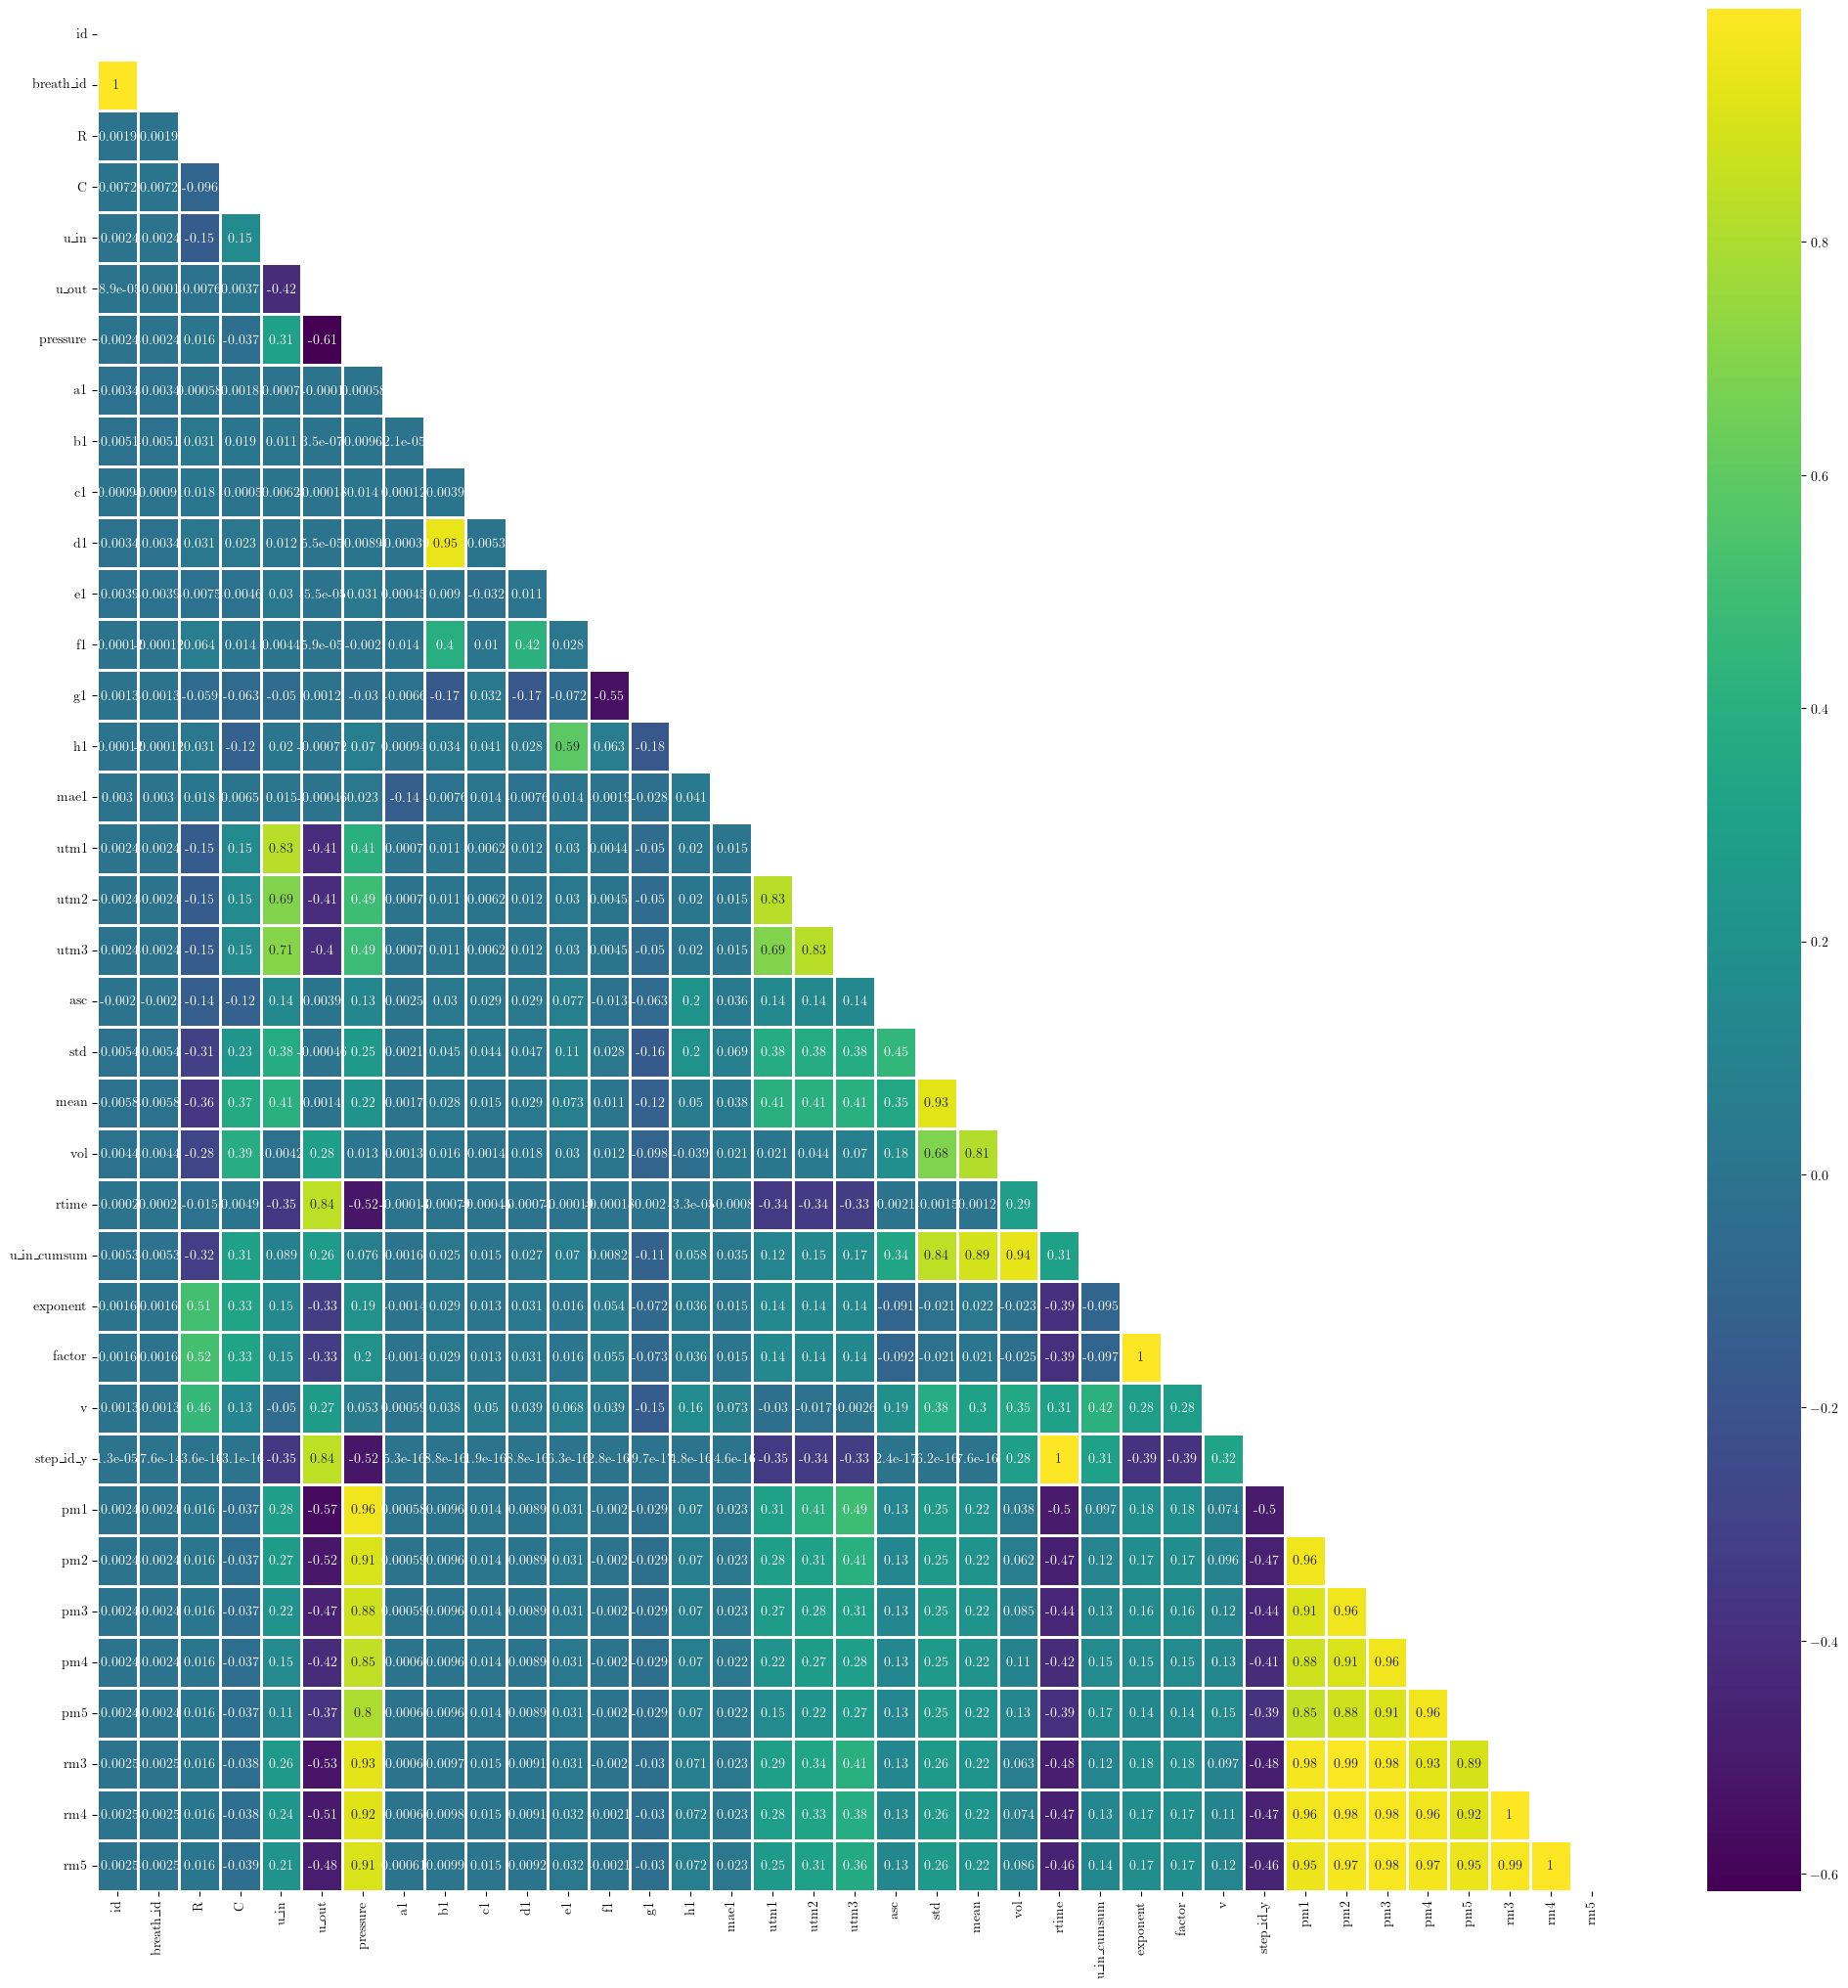

In [15]:
plt.figure(figsize=(25, 25))
matrix = np.triu(df_feats.corr())
sns.heatmap(df_feats.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="viridis")
plt.show();